In [45]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 3
#### Пусть x1, . . . , xn ∈ Bern(p). Исследуйте зависимость ширины доверительного интервала для параметра распределения p от объема выборки.

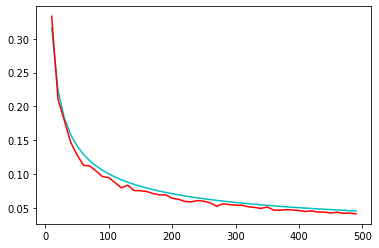

In [62]:
n = range(10, 500, 10) # зададим объемы выборок
q = 0.999 # уровень доверительного интервала
p = 0.3 # параметр распределения Бернулли
x = []
y = []
y_1 = []
for i in n:
    sample = np.random.binomial(1, p, i) # создали выборку, распределенную по Бернули с параметром p объема i
    quantile = np.quantile(sample, (1 + q)/2) #квантиль
    sample_mean = sum(sample) / i # выборочное среднее
    sample_var = sum([(k - sample_mean)**2 for k in sample]) / (i - 1) # исправленная выборочная дисперсия
    width = 2*quantile*sample_var**0.5/np.sqrt(i) # длина доверительного интервала
    # print('[', sample_mean - quantile*sample_var**0.5/np.sqrt(i), ', ', sample_mean + quantile*sample_var**0.5/np.sqrt(i), ']', sep='')
    y.append(width) #ширина интервала
    x.append(i) # объем выборки
    y_1.append(1/np.sqrt(i))
sns.lineplot(x=x, y=y_1, color='c'); # функция y(x) = 1/sqrt(x), чтобы видеть скорость сходимости
sns.lineplot(x=x, y=y, color='r'); # рисуем график зависимости ширины интервала от объема выборки

На графике видно, что ширина доверительного интервала уменьшается с увеличением объема выборки со скоростью O(1/sqrt(n))